# Tensorflow Tutorial


Copyright 2018 liang wei

# 用tf.constant 在计算图中构建节点

使用一个名为tf.constant 的函数构建一个节点

In [1]:
import tensorflow as tf
two_node = tf.constant(2)
print(two_node)

Tensor("Const:0", shape=(), dtype=int32)


计算图：
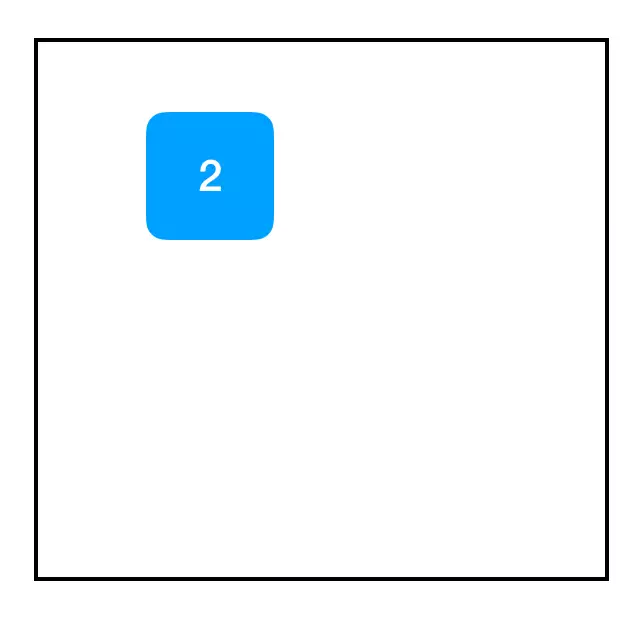


这样我们得到一个节点，它包含常量2。当我们打印这个变量时，我们看到它返回一个tf.Tensor 对象，它是一个指向我们刚刚创建的节点的指针


为了强调这点，给出以下的另一个示例：

In [2]:
import tensorflow as tf
two_node = tf.constant(2)
another_two_node = tf.constant(2)
two_node = tf.constant(2)
tf.constant(3)

<tf.Tensor 'Const_4:0' shape=() dtype=int32>

每一次调用tf.constant 时，我们都会在图中创建一个新的节点。即使该节点的功能与现有的节点相同，即使我们将节点重新分配同一个变量，结果都是一样的。
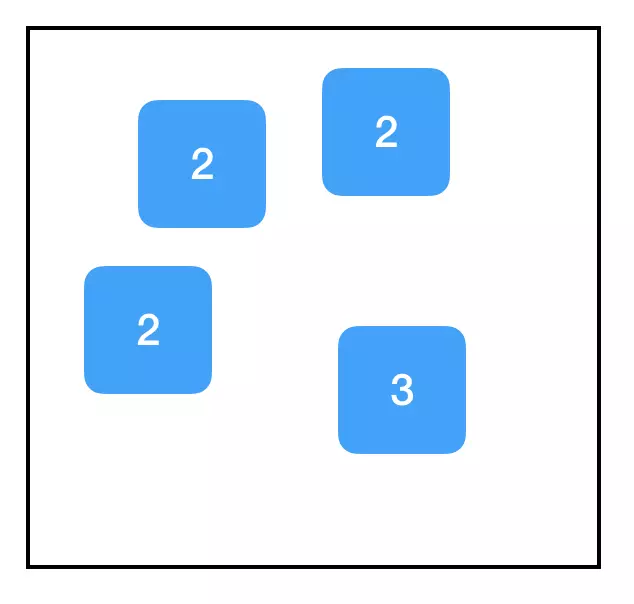

代码：

In [3]:
import tensorflow as tf
two_node = tf.constant(2)
another_pointer_at_two_node = two_node
two_node = None
print(two_node)
print(another_pointer_at_two_node)

None
Tensor("Const_5:0", shape=(), dtype=int32)


计算图：
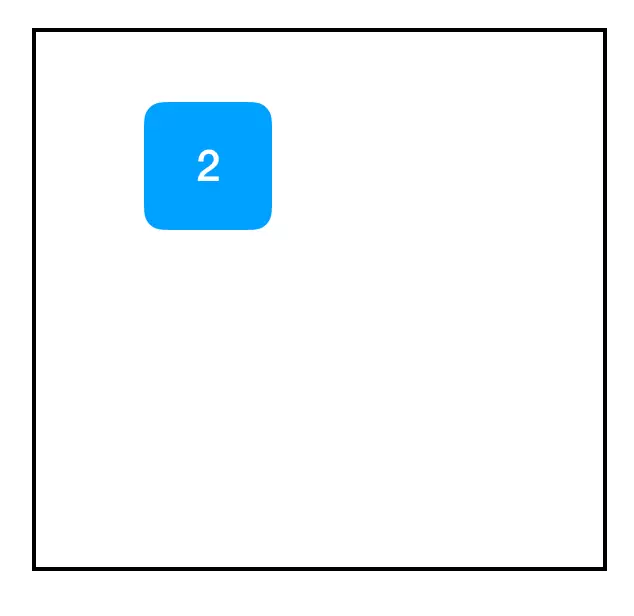

更进一步：

In [4]:
import tensorflow as tf
two_node = tf.constant(2)
three_node = tf.constant(3)
sum_node = two_node + three_node ## equivalent to tf.add(two_node, three_node)
print(sum_node)


Tensor("add:0", shape=(), dtype=int32)


In [5]:
sess = tf.InteractiveSession()
sess.run(sum_node)

5

计算图：
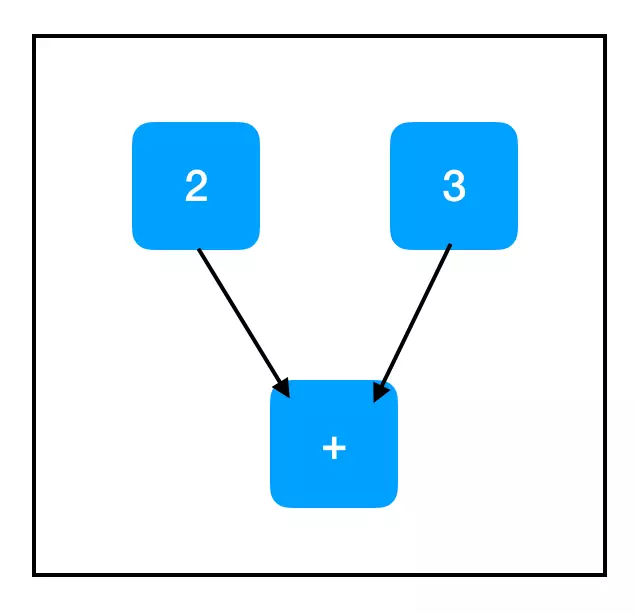

现在才是真正的计算图！请注意，+操作在tensorflow 中过载，因此同时添加两个张量会在图中增加一个节点，尽管它表面上看起来不像是 Tensorflow 操作。

two_node 指向包含 2 的节点，three_node 指向包含 3 的节点，同时sum_node 指向包含 + 的节点？（注：为什么不是包含 5 的节点，事实证明，计算图只包含计算步骤，不包含计算结果，至少现在还没有！）

## 2、会话
会话的作用是处理内存分配和优化，使我们能够更实际的执行由图指定的计算。（可以将计算图想象成我们要执行的计算模板；它列出了所有步骤。）为了使用计算图，我们需要启动一个会话，它使我们能够实际的完成任务（例如，遍历模板的所有节点来分配一堆用于存储计算输出的的存储器）

为了使用 Tensorflow 进行各种计算，你既需要计算图也需要会话。会话包含一个指向全局图的指针，该指针通过指向所有节点的指针不断更新。这就意味着在创建节点之前还是之后创建会话都无所谓。

创建会话对象后，可以使用sess.run(node) 返回节点的值，并且Tensorflow将执行确定该值所需的所有计算。

In [6]:
sess.run(sum_node)

5

我们还可以传递一个列表，sess.run([node1, node2, ...]), 并让它返回多个输出：

In [7]:
sess.run([two_node,sum_node])

[2, 5]

一般来说，sess.run() 的调用往往是tensorflow 的最大的瓶颈之一，因此调用它的次数越少越好，如果可以的话，在一个sess.run() 的调用中返回多个项目，而不是进行多次调用。

## 占位符和feed_dict

迄今为止，我们所做的计算一直很乏味：没有机会获得输入，所以它们总是输出相同的东西。一个有价值的应用可能涉及构建一个计算图，他接受输入，以某种（一致）方式处理它，并返回一个输出。

最直接的方法就是使用占位符。（占位符是一种用于接受外部输入的节点）

In [9]:
input_placeholder = tf.placeholder(tf.int32)
print(sess.run(input_placeholder))

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype int32
	 [[Node: Placeholder = Placeholder[dtype=DT_INT32, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: Placeholder/_7 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_5_Placeholder", tensor_type=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder', defined at:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-5c7af30b776b>", line 1, in <module>
    input_placeholder = tf.placeholder(tf.int32)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1808, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 5835, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype int32
	 [[Node: Placeholder = Placeholder[dtype=DT_INT32, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: Placeholder/_7 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_5_Placeholder", tensor_type=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


计算图：
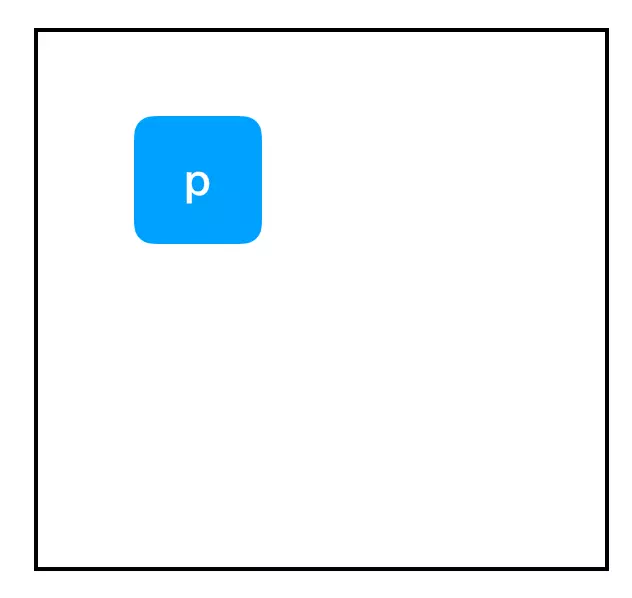

这是一个糟糕的例子，它引发了一个异常。占位符预计会被赋予一个值。但是我们没有提供一个值，所以Tensorflow 崩溃了。

我们使用 sess.run() 的 feed_dict 属性。

In [10]:
sess.run(input_placeholder, feed_dict={input_placeholder: 2})

array(2)

注意传递给 feed_dict 的 dict 格式，其关键应该是与图中的占位符节点相对应的变量（如前所述，它实际上意味着指向图中占位符节点的指针）。相应的值是要分配给每一个占位符的数据元素（通常是标量或是Numpy数组）

## 计算路径
另一个使用占位符的示例

In [11]:
input_placeholder = tf.placeholder(tf.int32)
three_node = tf.constant(3)
sum_node = input_placeholder + three_node
print(sess.run(three_node))
print(sess.run(sum_node))

3


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_1' with dtype int32
	 [[Node: Placeholder_1 = Placeholder[dtype=DT_INT32, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

Caused by op 'Placeholder_1', defined at:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-b074a2d322ec>", line 1, in <module>
    input_placeholder = tf.placeholder(tf.int32)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1808, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 5835, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_1' with dtype int32
	 [[Node: Placeholder_1 = Placeholder[dtype=DT_INT32, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]


计算图：
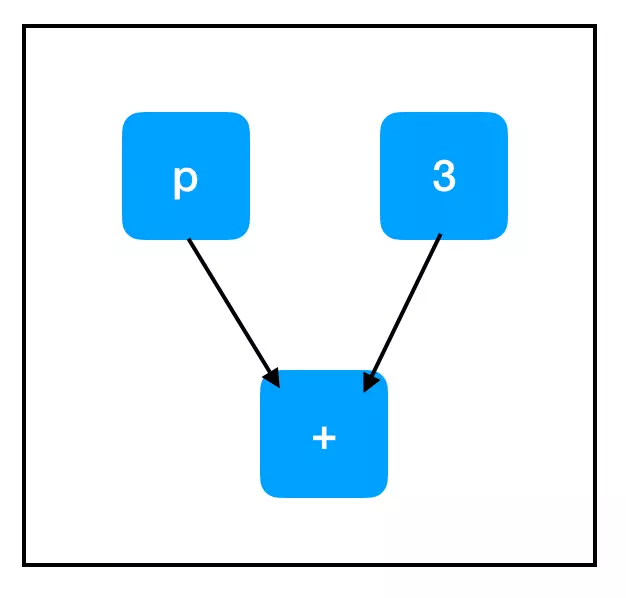

为什么第二次调用 sess.run() 会失败？ 即使我们没有评估 input_placeholder, 为什么会引发与 input_placeholder 相关的错误？答案在最终的关键 Tensorflow 抽象：计算路径。

当我们在依赖于图中其他节点的节点上调用 sess.run() 时，我们也需要计算那些节点的值。如果这些节点具有依赖关系。那我们需要计算这些值（以此类推...）直到计算图的【顶端】即节点没有父节点时。

sum_node 的计算路径：
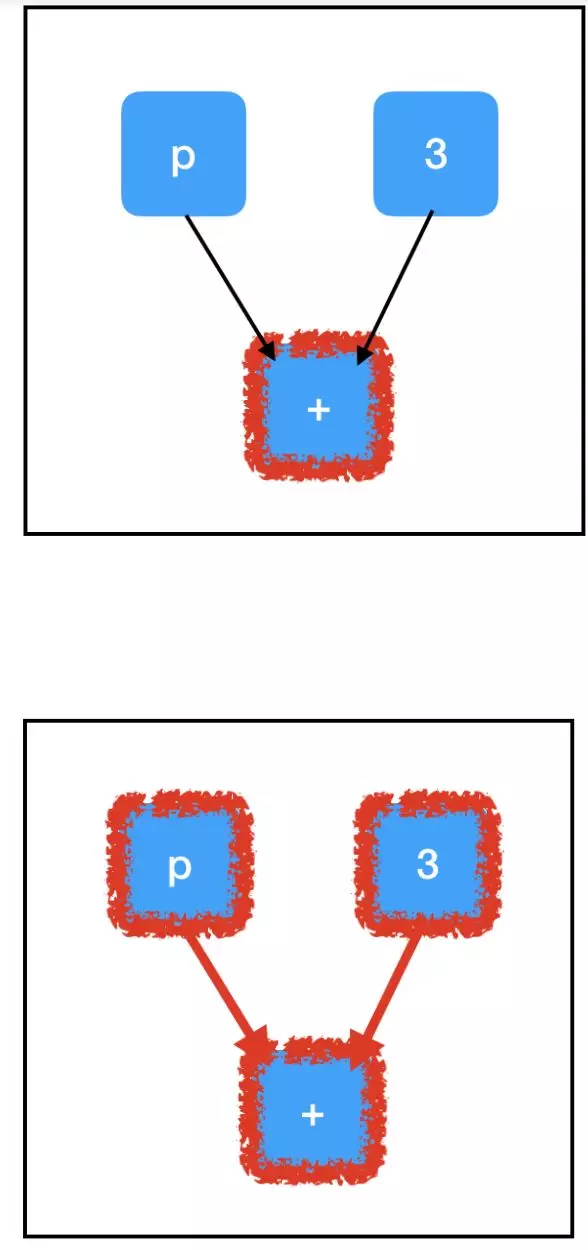
所有三个节点都需要进行求值以计算 sum_node 的值，最重要的是这里包含我们为填充的占位符，所以出现了异常！

根据图结构，我们不需要计算所有节点才能评估我们想要的节点！因为我们在评估 three_node 时不需要评估 placeholder_node，所以运行sess.run(three_node)不会引发异常。

TensorFlow 仅通过必需的节点自动进行计算这一事实是该框架的一个巨大优势。如果计算图非常大并且有许多不必要的节点，那么它可以节省大量调用的运行时间。它允许我们构建大型的「多用途」计算图，这些计算图使用单个共享的核心节点集合，并根据所采取的不同计算路径去做不同的事情。对于几乎所有应用而言，根据所采取的计算路径考虑 sess.run() 的调用是很重要的。

## 变量和副作用
变量：在运行时可以被更新。模型的参数在训练期间通过梯度下降被更新；在评估时参数保持不变。

### 创建参数
tf.get_variable(name,shape)

name 是一个唯一的标示这个变量对象的字符串，它必须相对于全局图是唯一的，所以要明了使用过的所有命名，确保没有重复。

shape 是与张量形状对应的整数数组，它的语法非常直观：按顺序，每个维度只有一个整数。例如，一个 3x8 矩阵形状是 [3, 8]。要创建一个标量，就需要使用形状为 [] 的空列表。

In [13]:
count_variable = tf.get_variable('count',[])
print(sess.run(count_variable))

FailedPreconditionError: Attempting to use uninitialized value count
	 [[Node: count/_12 = _Send[T=DT_FLOAT, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_4_count", _device="/job:localhost/replica:0/task:0/device:GPU:0"](count)]]
	 [[Node: count/_13 = _Recv[_start_time=0, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_4_count", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

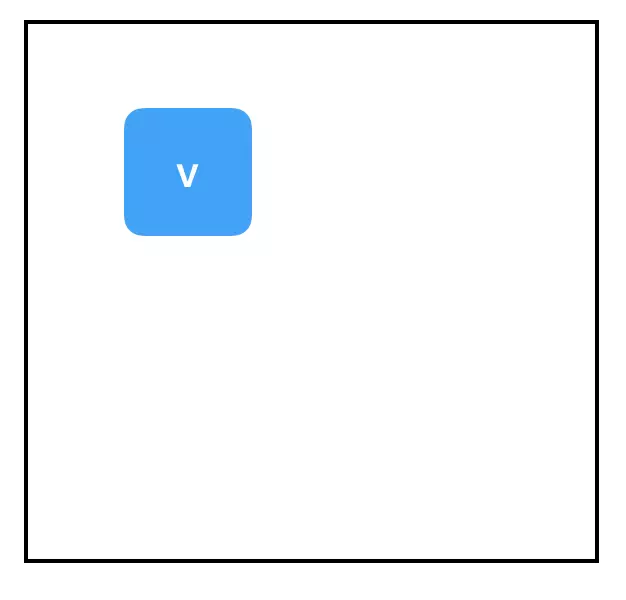
噫，另一个异常。当首次创建变量节点时，它的值基本上为「null」，并且任何试图对它求值的操作都会引发这个异常。我们只能在将值放入变量之后才能对其求值。主要有两种将值放入变量的方法：初始化器和 tf.assign()。我们先看看 tf.assign()：

In [15]:
zero_node = tf.constant(0.)
assign_node = tf.assign(count_variable, zero_node)

sess.run(assign_node)
print (sess.run(count_variable))

0.0


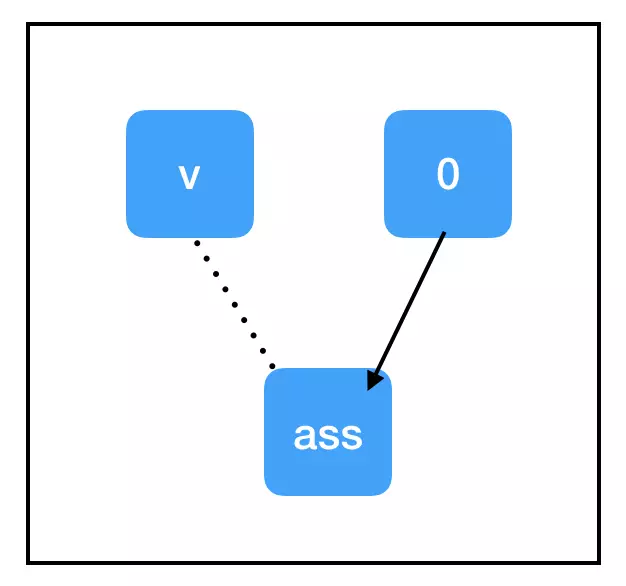
与我们迄今为止见过的节点相比，tf.assign(target, value) 是具备一些独特属性：

    恒等运算。tf.assign(target, value) 不做任何有趣的运算，通常与 value 相等。

    副作用。当计算「流经」assign_node 时，副作用发生在图中的其他节点上。此时，副作用是用存储在 zero_node 中的值替换 count_variable 的值。

    非依赖边。即使 count_variable 节点和 assign_node 在图中是相连的，但它们彼此独立。这意味着计算任一节点时，计算不会通过边回流。然而，assign_node 依赖于 zero_node，它需要知道分配了什么。

「副作用」节点支撑着大部分 Tensorflow 深度学习工作流程，所以请确保自己真正理解了在该节点发生的事情。当我们调用 sess.run(assign_node) 时，计算路径会通过 assign_node 和 zero_node。

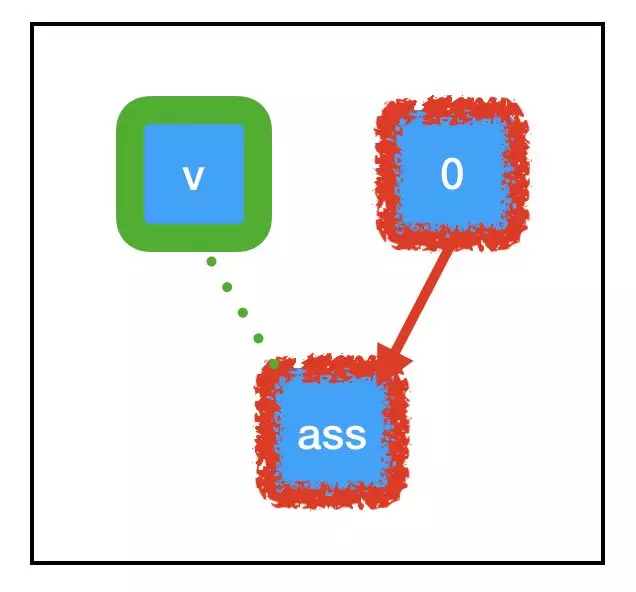
当计算流经图中的任何节点时，它还会执行由该节点控制的任何副作用，如图中绿色所示。由于 tf.assign 的特殊副作用，与 count_variable（之前为「null」）关联的内存现在被永久设置为 0。这意味着当我们下一次调用 sess.run(count_variable) 时，不会引发任何异常。相反，我们会得到 0 值。成功！

接下来，让我们看看初始化器：

In [23]:
const_init_node = tf.constant_initializer(0.)
count_variable_new = tf.get_variable("count_new", [], initializer=const_init_node)
print (sess.run([count_variable_new]))

ValueError: Variable count_new already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)


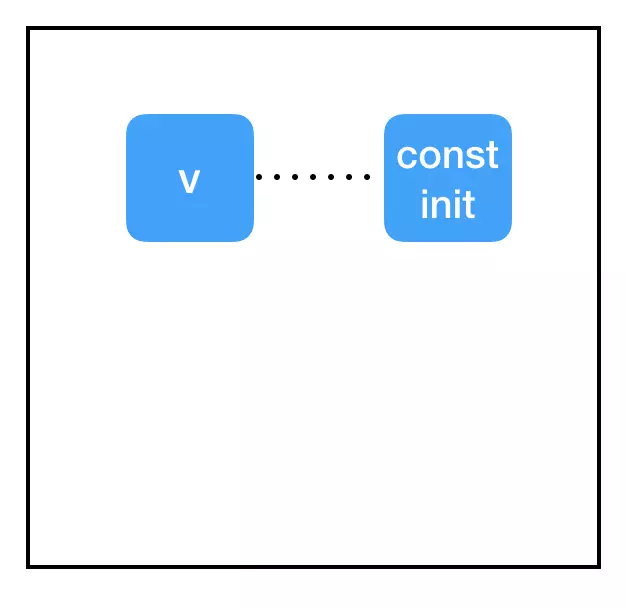

那好，这里发生了什么？为什么初始化器不工作？

问题出现在会话和图之间的分离。我们已将 get_variable 的 initializer 属性设置为指向 const_init_node，但它只是在图中的节点之间添加了一个新的连接。我们还没有做任何解决异常根源的事：与变量节点（存储在会话中，而不是计算图中）相关联的内存仍然设置为「null」。我们需要通过会话使 const_init_node 去更新变量。

In [22]:
const_init_node = tf.constant_initializer(0.)
count_variable = tf.get_variable("count_new0", [], initializer=const_init_node)
init = tf.global_variables_initializer()
sess.run(init)
print (sess.run(count_variable))

0.0


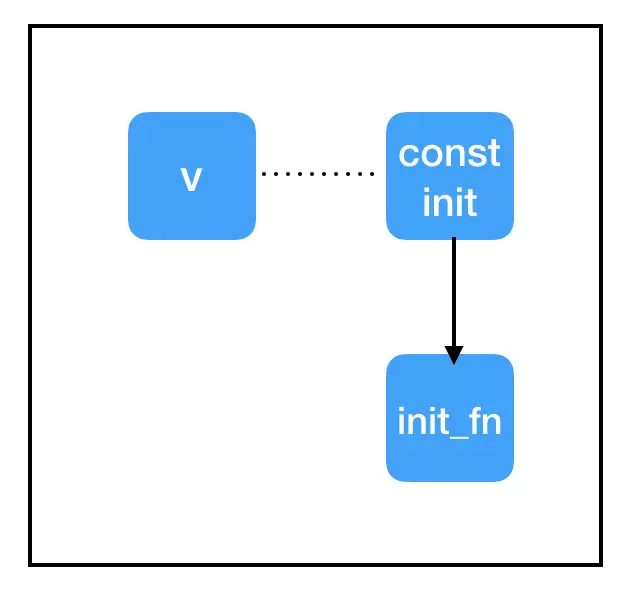
为此，我们添加另一个特殊的节点：init = tf.global_variables_initializer()。与 tf.assign() 类似，这是一个带有副作用的节点。与 tf.assign() 相反，实际上我们不需要指定它的输入是什么！tf.global_variables_initializer() 将在其创建时查看全局图并自动将依赖关系添加到图中的每个 tf.initializer。当我们在之后使用 sess.run(init) 对它求值时，它会告诉每个初始化程序执行变量初始化，并允许我们运行 sess.run(count_variable) 而不出错。

#### 变量共享
在RNN中可能会涉及到变量共享代码，其涉及创建作用域并设置[reuse=True]。强烈不建议使用变量共享，如果想在多个地方使用单个变量，只需要以编程方式记录指向该变量节点的指针，并在需要时重新使用它。换言之，对于想要保存在内存中的每一个变量，你只需要调用一次tf.get_variavle()


### 优化器
下面进行真正的深度学习！
在深度学习中典型的【内循环】训练如下：

    1、获取输入和true_output
    2、根据输入和参数计算【推测】值
    3、根据推测与true_output 之间的差异计算【损失】
    4、根据损失的梯度进行参数更新

简单的线性回归问题

In [32]:
import tensorflow as tf
import random
## build the graph
##first set up the parameters
m = tf.get_variable("m3",[],initializer=tf.constant_initializer(0.))
b = tf.get_variable("b3",[],initializer=tf.constant_initializer(0.))
init = tf.global_variables_initializer()
## then set up the computations
input_placeholder = tf.placeholder(tf.float32)
output_placeholder = tf.placeholder(tf.float32)

x = input_placeholder
y = output_placeholder
y_guess = m * x + b
loss = tf.square(y - y_guess)
## finally, set up the optimizer and minimization node
optimizer = tf.train.GradientDescentOptimizer(1e-3)
train_op = optimizer.minimize(loss)
## start the session
sess = tf.Session()
sess.run(init)
### perform the training loop * import * random
## set up problem 
true_m = random.random()
true_b = random.random()
for updata_i in range(10000):
    ## get the input and output
    input_data = random.random()
    output_data = true_m * input_data + true_b
    ## (2),(3)and(4) all take place within a single call to see.run()!
    _loss, _ = sess.run([loss,train_op],feed_dict={input_placeholder: input_data, output_placeholder: output_data})
    print(updata_i, _loss)

0 0.4857582
1 0.70739806
2 0.65646565
3 0.916311
4 0.48689628
5 0.5930419
6 0.7090866
7 0.4159527
8 0.89703417
9 0.8282377
10 0.62830734
11 0.51737803
12 0.4229082
13 0.85294163
14 0.8545735
15 0.5377138
16 0.7543343
17 0.8152749
18 0.66270304
19 0.40834287
20 0.55406183
21 0.66141427
22 0.83075505
23 0.4162506
24 0.43486354
25 0.5386508
26 0.70987844
27 0.421822
28 0.7402646
29 0.40423703
30 0.68895847
31 0.4319046
32 0.4698654
33 0.4442165
34 0.7217676
35 0.7871767
36 0.54756624
37 0.41283494
38 0.6280004
39 0.6945393
40 0.550462
41 0.49873832
42 0.38248423
43 0.5638613
44 0.720786
45 0.33932388
46 0.53814626
47 0.66803557
48 0.41721123
49 0.46968558
50 0.55498236
51 0.72556114
52 0.55046403
53 0.3699733
54 0.59182805
55 0.66590434
56 0.4956321
57 0.64688224
58 0.5829397
59 0.5926573
60 0.6234564
61 0.3802233
62 0.36368912
63 0.3152174
64 0.3805791
65 0.5862938
66 0.42168877
67 0.4031766
68 0.3422286
69 0.63843495
70 0.45377016
71 0.33946365
72 0.54172695
73 0.46317318
74 0.63403016


721 0.017377995
722 0.02028617
723 0.021823674
724 0.011951941
725 0.016042314
726 0.012442373
727 0.019414268
728 0.015457323
729 0.011220161
730 0.010955507
731 0.021487579
732 0.017914476
733 0.018310085
734 0.02147844
735 0.020438196
736 0.014884824
737 0.011775627
738 0.0155012235
739 0.017936662
740 0.018416168
741 0.019382838
742 0.019733
743 0.014289507
744 0.018079132
745 0.0125660235
746 0.011330706
747 0.010872925
748 0.011020874
749 0.013987308
750 0.011446422
751 0.013453095
752 0.018431978
753 0.009707396
754 0.009576821
755 0.013953873
756 0.012220482
757 0.016011061
758 0.013401101
759 0.016688123
760 0.015849601
761 0.010394384
762 0.017299589
763 0.01263983
764 0.01742728
765 0.012172864
766 0.011485201
767 0.012949447
768 0.009909884
769 0.011171788
770 0.013229787
771 0.013448671
772 0.016809879
773 0.010667511
774 0.009071418
775 0.009752609
776 0.01563184
777 0.01701918
778 0.010138153
779 0.013277519
780 0.00866739
781 0.011382843
782 0.008576425
783 0.01080246
7

1420 0.00049340335
1421 0.00047659673
1422 0.00045161103
1423 0.0005201485
1424 0.00046406087
1425 0.000500528
1426 0.0004357995
1427 0.00043724407
1428 0.00045654926
1429 0.00049439416
1430 0.0004939887
1431 0.00049314916
1432 0.00047043074
1433 0.00048043786
1434 0.00047460012
1435 0.00042496272
1436 0.0004451515
1437 0.00045080832
1438 0.00043813445
1439 0.00047247813
1440 0.0004258577
1441 0.0004431015
1442 0.00042212175
1443 0.00041347664
1444 0.00041103925
1445 0.00044363868
1446 0.00043419335
1447 0.00043824923
1448 0.00044957653
1449 0.00043709952
1450 0.00043884586
1451 0.00039937007
1452 0.0004193196
1453 0.0004081899
1454 0.0004274804
1455 0.00041807315
1456 0.00038567922
1457 0.00042023795
1458 0.00039786348
1459 0.00040617888
1460 0.00038868873
1461 0.00037535236
1462 0.000385031
1463 0.00037216276
1464 0.0004029563
1465 0.0003863725
1466 0.00039221262
1467 0.00038613353
1468 0.00039511474
1469 0.00039089166
1470 0.00038647093
1471 0.000364139
1472 0.00037460215
1473 0.000

1910 3.1115207e-05
1911 2.527009e-05
1912 5.6918845e-05
1913 5.8092213e-05
1914 2.9088611e-05
1915 5.128108e-05
1916 4.7871275e-05
1917 7.05684e-05
1918 2.3734296e-05
1919 3.6366928e-05
1920 1.7695966e-05
1921 5.9007103e-05
1922 3.7257996e-05
1923 6.8370646e-05
1924 4.718423e-05
1925 6.361175e-05
1926 5.6031953e-05
1927 3.300564e-05
1928 2.7908809e-05
1929 1.680336e-05
1930 2.1297756e-05
1931 2.043147e-05
1932 6.3693544e-05
1933 5.260934e-05
1934 2.0994066e-05
1935 3.4768113e-05
1936 5.6355442e-05
1937 5.5333658e-05
1938 3.835746e-05
1939 5.2154654e-05
1940 5.324678e-05
1941 2.0973861e-05
1942 3.2952925e-05
1943 2.8392025e-05
1944 2.41959e-05
1945 1.5975755e-05
1946 6.594312e-05
1947 3.6251997e-05
1948 3.7351194e-05
1949 3.1848944e-05
1950 3.1644755e-05
1951 2.9181268e-05
1952 1.9650222e-05
1953 4.655744e-05
1954 1.4315956e-05
1955 2.6571845e-05
1956 2.0498339e-05
1957 1.557473e-05
1958 1.4653957e-05
1959 4.0004954e-05
1960 2.7114113e-05
1961 1.3097271e-05
1962 3.1253006e-05
1963 3.295

2423 1.2178651e-05
2424 1.5685378e-06
2425 2.913705e-06
2426 1.7329832e-06
2427 1.4283049e-05
2428 9.102699e-06
2429 9.777624e-06
2430 1.0745786e-05
2431 1.3750185e-05
2432 8.363075e-06
2433 2.2866577e-06
2434 1.1453433e-05
2435 4.8899906e-10
2436 2.7762894e-09
2437 5.6245303e-06
2438 3.870747e-07
2439 1.5289539e-05
2440 8.782234e-06
2441 2.0733955e-06
2442 1.7129893e-05
2443 6.326993e-07
2444 3.522226e-07
2445 2.0060294e-05
2446 1.4465641e-07
2447 1.8445753e-06
2448 1.0051067e-06
2449 1.9493164e-06
2450 7.748078e-10
2451 1.5147699e-05
2452 6.194679e-06
2453 3.50953e-08
2454 1.7320417e-08
2455 1.1159621e-05
2456 1.9753932e-05
2457 3.7617966e-08
2458 3.0568433e-06
2459 2.6730004e-07
2460 6.149049e-07
2461 8.141515e-06
2462 6.8346003e-07
2463 7.4902005e-09
2464 5.0315048e-06
2465 1.852999e-07
2466 1.1515908e-06
2467 9.9006456e-08
2468 6.7226225e-08
2469 1.4087294e-05
2470 3.4287586e-07
2471 5.8778073e-06
2472 1.3885884e-06
2473 3.4483315e-07
2474 2.1290361e-06
2475 8.7827607e-07
2476 4.2

2952 1.0978766e-07
2953 2.6414045e-06
2954 3.3193555e-07
2955 1.8918263e-06
2956 2.144894e-06
2957 1.0610614e-07
2958 5.0115693e-07
2959 6.0360817e-06
2960 2.9396049e-06
2961 1.2251352e-08
2962 3.8184235e-06
2963 6.5995564e-06
2964 1.1184724e-05
2965 4.5923025e-06
2966 1.1485327e-05
2967 1.5374894e-06
2968 3.7627215e-06
2969 3.53638e-06
2970 1.6139126e-09
2971 1.0600133e-05
2972 4.5286592e-06
2973 2.1325163e-06
2974 3.529658e-06
2975 1.0676341e-05
2976 3.099231e-07
2977 7.4383274e-06
2978 3.3558564e-07
2979 9.0069225e-06
2980 7.4162353e-06
2981 4.1170897e-06
2982 3.8298463e-06
2983 3.82785e-07
2984 8.355148e-06
2985 2.3091162e-07
2986 5.866541e-06
2987 4.6381438e-06
2988 1.9808542e-07
2989 1.5862046e-06
2990 2.8088534e-06
2991 9.613929e-08
2992 1.5355685e-06
2993 1.80457e-07
2994 4.7434824e-08
2995 2.6141574e-06
2996 1.4473537e-06
2997 2.2503891e-06
2998 1.06374255e-05
2999 7.2022412e-06
3000 7.6812375e-07
3001 4.8073057e-06
3002 1.9528131e-06
3003 3.2683884e-06
3004 3.3654335e-06
3005

3501 9.3606127e-07
3502 3.3639028e-06
3503 2.2798126e-06
3504 6.7622436e-06
3505 3.984301e-09
3506 4.3225305e-06
3507 2.129732e-06
3508 5.705109e-06
3509 2.7593258e-06
3510 2.0466508e-07
3511 2.6081857e-06
3512 5.6555183e-07
3513 3.7984166e-06
3514 1.5563192e-08
3515 3.6577871e-06
3516 2.165896e-06
3517 9.3076335e-07
3518 2.5673398e-06
3519 2.3395978e-06
3520 1.3200611e-06
3521 3.5527137e-15
3522 5.1112355e-08
3523 8.154785e-08
3524 2.708669e-06
3525 1.0249232e-06
3526 3.968013e-08
3527 6.9231473e-06
3528 1.3237618e-06
3529 2.5499526e-07
3530 4.0072914e-06
3531 2.4563187e-07
3532 7.5856806e-06
3533 1.2624042e-07
3534 6.507395e-06
3535 7.027129e-07
3536 1.1538947e-06
3537 2.6245758e-08
3538 1.6909567e-07
3539 4.413968e-06
3540 7.95103e-07
3541 8.023912e-06
3542 2.107695e-06
3543 1.9536462e-06
3544 1.7181069e-06
3545 5.8158334e-06
3546 7.0892224e-07
3547 1.4212853e-07
3548 2.3949883e-06
3549 4.1054877e-06
3550 2.5660029e-06
3551 1.0737659e-06
3552 2.107349e-06
3553 1.298917e-06
3554 1.59

4047 2.276574e-06
4048 3.865557e-07
4049 1.7963238e-06
4050 5.552949e-06
4051 6.7844314e-07
4052 4.0261657e-06
4053 1.1149169e-06
4054 3.2683884e-06
4055 8.989526e-07
4056 1.8424712e-06
4057 3.9310553e-06
4058 2.741226e-07
4059 1.4834297e-06
4060 5.1228308e-06
4061 4.9986684e-06
4062 5.668076e-07
4063 9.206701e-07
4064 3.6219706e-07
4065 1.7454029e-06
4066 1.4592871e-07
4067 5.652554e-06
4068 1.3899935e-06
4069 6.9532916e-08
4070 1.3779329e-06
4071 4.941e-06
4072 1.4220805e-06
4073 2.1780181e-06
4074 4.567556e-06
4075 4.6942805e-06
4076 6.3292136e-06
4077 1.9973358e-07
4078 3.375913e-07
4079 1.8120156e-06
4080 2.7446918e-06
4081 5.9540635e-06
4082 3.994089e-07
4083 7.485043e-07
4084 5.794421e-07
4085 3.6662277e-06
4086 1.7070306e-08
4087 5.094809e-06
4088 2.1506594e-06
4089 8.920907e-08
4090 5.0069343e-06
4091 5.194038e-06
4092 7.587495e-07
4093 4.93423e-07
4094 5.144709e-06
4095 1.1072519e-06
4096 1.8070446e-06
4097 2.244313e-06
4098 3.3632468e-06
4099 6.2583354e-06
4100 1.5791417e-07

4591 8.8757315e-07
4592 1.6569402e-06
4593 5.5271353e-06
4594 4.138403e-08
4595 2.8475451e-06
4596 1.8126575e-06
4597 5.7410057e-07
4598 1.684212e-06
4599 5.9537724e-06
4600 2.7338402e-08
4601 7.1838855e-09
4602 1.890351e-06
4603 7.29444e-07
4604 1.9596885e-07
4605 4.9039722e-06
4606 1.2100082e-06
4607 9.9833386e-08
4608 5.561661e-06
4609 5.2092632e-06
4610 4.130162e-06
4611 5.2087194e-06
4612 1.719508e-07
4613 6.583668e-07
4614 4.2777063e-07
4615 1.531435e-06
4616 4.147138e-06
4617 1.729846e-06
4618 6.53845e-08
4619 4.3005e-06
4620 4.7890267e-06
4621 1.1708597e-06
4622 2.0688219e-07
4623 1.8282592e-06
4624 3.5631074e-06
4625 6.57508e-08
4626 3.977993e-06
4627 7.2862974e-07
4628 5.3225904e-07
4629 3.0866346e-07
4630 2.1338487e-07
4631 1.2735004e-06
4632 2.2868378e-06
4633 3.0575623e-07
4634 1.4299098e-06
4635 1.4483783e-07
4636 4.6919563e-06
4637 4.389957e-06
4638 5.658208e-09
4639 2.4057006e-06
4640 3.2436512e-06
4641 2.126254e-06
4642 1.4994439e-06
4643 4.6296755e-06
4644 3.673307e-0

5120 5.09036e-09
5121 8.349193e-09
5122 1.4896796e-06
5123 4.1112867e-06
5124 2.8477464e-06
5125 5.659105e-07
5126 2.6590646e-06
5127 2.1831231e-06
5128 1.8269205e-07
5129 3.0416473e-08
5130 3.5586083e-06
5131 4.815673e-06
5132 1.0864518e-07
5133 1.9523074e-07
5134 1.2475358e-06
5135 5.018945e-06
5136 4.696605e-06
5137 5.1167603e-07
5138 3.7967905e-06
5139 2.0480687e-08
5140 1.0108023e-07
5141 1.0371227e-07
5142 3.449049e-06
5143 2.105619e-06
5144 5.4144903e-06
5145 1.5036801e-06
5146 3.27572e-06
5147 2.0608838e-06
5148 1.6738626e-06
5149 7.028128e-07
5150 2.0536677e-07
5151 4.0087234e-06
5152 1.2172311e-08
5153 1.7542848e-07
5154 1.3099452e-06
5155 1.9813848e-07
5156 6.676339e-08
5157 1.8937944e-06
5158 1.24234845e-08
5159 7.787948e-08
5160 2.1410133e-07
5161 9.1986965e-07
5162 1.8366144e-09
5163 2.3917588e-07
5164 9.544895e-07
5165 4.1741287e-06
5166 3.074794e-06
5167 1.916336e-06
5168 6.088438e-07
5169 2.1532826e-06
5170 9.4542673e-07
5171 2.763882e-06
5172 5.463978e-06
5173 1.40168

5574 3.8241632e-07
5575 1.6144046e-06
5576 1.9124815e-07
5577 3.8091114e-06
5578 7.402762e-07
5579 2.0176449e-06
5580 2.0422724e-06
5581 1.2947087e-08
5582 1.5712263e-08
5583 4.1078965e-07
5584 1.9970396e-06
5585 1.4699576e-06
5586 3.8321796e-06
5587 3.2606345e-06
5588 2.9808305e-06
5589 2.0429538e-06
5590 3.4890145e-06
5591 2.5480842e-06
5592 2.1064839e-08
5593 3.5039493e-06
5594 1.2470033e-06
5595 7.9022084e-07
5596 1.7012667e-09
5597 3.1985082e-06
5598 3.817259e-06
5599 1.2865829e-06
5600 3.3680582e-08
5601 5.190357e-07
5602 2.9094333e-06
5603 3.640648e-07
5604 1.2450073e-06
5605 2.0325735e-06
5606 3.0892843e-07
5607 2.12921e-06
5608 1.1883384e-06
5609 1.4518031e-06
5610 2.3509165e-06
5611 4.258085e-08
5612 3.7207537e-06
5613 2.921035e-06
5614 1.1765422e-06
5615 3.3901908e-06
5616 1.2446776e-07
5617 2.576899e-06
5618 3.1052068e-07
5619 2.5338325e-06
5620 7.438704e-07
5621 2.1330386e-06
5622 3.9812915e-07
5623 2.7496312e-06
5624 3.0043395e-06
5625 7.488137e-07
5626 2.369597e-06
5627 

6036 2.0769632e-07
6037 7.939342e-07
6038 2.737192e-06
6039 1.7984982e-07
6040 1.4172434e-07
6041 3.9112265e-06
6042 2.4140281e-06
6043 8.37411e-08
6044 4.1838854e-07
6045 8.440942e-07
6046 1.8898593e-06
6047 2.8128397e-07
6048 8.052979e-08
6049 1.3570227e-06
6050 3.4514846e-06
6051 1.2654416e-06
6052 3.772002e-07
6053 1.6746338e-06
6054 4.7772946e-08
6055 8.603337e-08
6056 1.6994073e-06
6057 2.4310982e-06
6058 2.7342344e-06
6059 4.908461e-08
6060 2.5547706e-07
6061 4.3272408e-10
6062 9.5107126e-08
6063 6.7752694e-08
6064 6.1621427e-07
6065 1.0344371e-07
6066 1.3357212e-08
6067 3.6641738e-06
6068 4.404956e-06
6069 6.3326837e-07
6070 2.342881e-06
6071 5.6417893e-08
6072 3.0621783e-07
6073 2.9880894e-07
6074 2.3754728e-06
6075 4.6009205e-07
6076 1.4809625e-06
6077 1.0220288e-06
6078 1.5637639e-08
6079 7.114531e-08
6080 3.3107658e-06
6081 1.8479769e-06
6082 1.8947788e-06
6083 2.9153332e-06
6084 2.574412e-06
6085 9.848202e-08
6086 4.1083867e-06
6087 1.2823947e-06
6088 2.332674e-06
6089 7.8

6477 2.7734032e-08
6478 2.245742e-06
6479 2.6705358e-09
6480 6.8158886e-07
6481 6.421215e-07
6482 2.5067948e-07
6483 1.4931736e-06
6484 2.1847086e-06
6485 8.704732e-07
6486 2.3337666e-06
6487 2.470475e-06
6488 7.5646676e-07
6489 1.78452e-06
6490 1.3928059e-08
6491 1.7190138e-07
6492 7.4551633e-07
6493 1.2395598e-06
6494 2.1277955e-07
6495 1.3163657e-06
6496 1.2403561e-06
6497 1.3064002e-06
6498 6.1257015e-07
6499 3.9430228e-07
6500 1.4280573e-06
6501 1.6994073e-06
6502 2.0317239e-06
6503 9.097221e-07
6504 9.354847e-07
6505 1.2918617e-06
6506 6.2044734e-08
6507 2.9580285e-06
6508 1.5360117e-06
6509 5.670769e-07
6510 3.083324e-07
6511 5.154448e-08
6512 1.8684256e-07
6513 2.5194314e-08
6514 2.244849e-06
6515 9.896301e-09
6516 1.5618266e-06
6517 2.77122e-06
6518 1.0297563e-06
6519 2.203072e-06
6520 1.7121743e-06
6521 2.0149366e-06
6522 1.6841008e-07
6523 5.512989e-07
6524 1.7567822e-07
6525 2.4641085e-06
6526 6.408803e-07
6527 2.687717e-06
6528 1.9669987e-08
6529 2.6400485e-06
6530 4.50040

6971 2.0128158e-07
6972 1.9943452e-06
6973 1.7813366e-06
6974 5.9451145e-07
6975 2.6456687e-06
6976 4.0903423e-09
6977 2.0429538e-06
6978 2.5822601e-08
6979 9.8856475e-08
6980 1.4840106e-06
6981 8.014936e-07
6982 7.645756e-09
6983 2.393697e-06
6984 3.3925568e-07
6985 3.626619e-08
6986 1.423929e-06
6987 1.9987247e-06
6988 1.6995627e-06
6989 3.9324735e-08
6990 4.5412787e-07
6991 3.2309965e-06
6992 7.7547156e-08
6993 9.439205e-09
6994 1.00869535e-08
6995 1.4396196e-06
6996 6.402124e-07
6997 2.6842001e-06
6998 1.8014401e-06
6999 2.1271233e-06
7000 3.14185e-07
7001 1.714827e-08
7002 1.0196198e-06
7003 2.5073916e-07
7004 3.3953347e-07
7005 7.053135e-09
7006 1.0523796e-06
7007 1.8465187e-06
7008 2.711809e-06
7009 5.142374e-07
7010 9.773352e-07
7011 1.4812275e-07
7012 1.7184194e-06
7013 1.4098811e-06
7014 8.4464193e-07
7015 1.5895093e-06
7016 8.6658474e-07
7017 5.7076346e-07
7018 2.3372706e-07
7019 2.5547706e-09
7020 1.4472104e-06
7021 2.448644e-07
7022 2.7859244e-06
7023 1.1195791e-06
7024 8.

7635 8.450802e-07
7636 4.294095e-07
7637 9.5146373e-07
7638 8.832116e-08
7639 1.3357212e-08
7640 1.1984321e-07
7641 1.4046486e-06
7642 1.5967316e-08
7643 1.1510792e-12
7644 1.9031569e-06
7645 2.3143214e-06
7646 2.8585453e-07
7647 4.8891155e-07
7648 8.429396e-08
7649 2.6662252e-07
7650 7.274092e-07
7651 2.5079023e-06
7652 1.4493622e-06
7653 1.5339921e-07
7654 1.4917987e-07
7655 9.92692e-08
7656 5.2575626e-07
7657 6.1546586e-07
7658 4.0888176e-07
7659 1.4854631e-06
7660 1.7746604e-08
7661 6.180741e-08
7662 1.7691066e-06
7663 1.141889e-06
7664 3.0338782e-07
7665 4.307425e-08
7666 6.364028e-07
7667 7.311759e-07
7668 2.4294255e-08
7669 5.3452266e-07
7670 1.6254268e-07
7671 5.411994e-08
7672 4.8541693e-07
7673 7.906448e-07
7674 1.5344591e-07
7675 1.7034503e-06
7676 2.6906491e-06
7677 1.1927608e-06
7678 3.4813112e-07
7679 1.7070306e-06
7680 2.8713066e-07
7681 7.362815e-07
7682 2.186483e-07
7683 1.2195997e-06
7684 2.4245182e-07
7685 9.754505e-09
7686 6.596248e-07
7687 1.6477461e-06
7688 1.6080

8116 5.2247674e-07
8117 2.3383216e-06
8118 6.654467e-07
8119 1.6851403e-06
8120 1.4969634e-06
8121 1.10301755e-07
8122 6.26102e-08
8123 4.5621897e-07
8124 1.3801728e-06
8125 7.1970265e-07
8126 1.5400678e-07
8127 1.9668314e-06
8128 5.49265e-07
8129 1.2067e-07
8130 1.8970768e-06
8131 3.4071536e-07
8132 2.1478631e-06
8133 1.218152e-06
8134 1.9211247e-06
8135 6.480661e-08
8136 6.918627e-07
8137 1.6287927e-07
8138 1.356745e-06
8139 5.848083e-09
8140 1.5581043e-06
8141 1.8017602e-06
8142 2.5746033e-08
8143 5.744184e-08
8144 1.4357604e-06
8145 1.8334208e-06
8146 2.1517085e-08
8147 3.4343452e-07
8148 1.746663e-06
8149 2.1820259e-07
8150 5.703132e-09
8151 1.0641702e-07
8152 8.6769484e-07
8153 3.70422e-07
8154 1.958648e-06
8155 1.6245688e-06
8156 7.086212e-07
8157 1.3437251e-07
8158 2.0303646e-06
8159 2.1151436e-08
8160 1.0186571e-06
8161 1.6539065e-07
8162 1.9284016e-06
8163 2.2866576e-08
8164 7.8736224e-07
8165 2.2257784e-06
8166 5.912071e-09
8167 2.427454e-07
8168 8.885842e-07
8169 5.6815463e

8572 6.7883593e-07
8573 1.2410201e-08
8574 4.2683553e-07
8575 1.1897683e-08
8576 7.955174e-08
8577 1.1508234e-06
8578 3.6926204e-07
8579 1.7207642e-06
8580 4.8342565e-07
8581 4.9133178e-09
8582 1.2906426e-08
8583 5.9226895e-08
8584 2.4996376e-07
8585 3.4490316e-07
8586 2.1543324e-06
8587 1.0479818e-06
8588 8.94099e-07
8589 1.3076268e-06
8590 1.9670836e-07
8591 1.247669e-08
8592 1.01469055e-08
8593 8.645347e-08
8594 7.823985e-07
8595 1.4809625e-06
8596 1.2152591e-06
8597 1.974362e-06
8598 1.5116629e-07
8599 4.895786e-07
8600 1.8020388e-07
8601 2.9611048e-08
8602 2.7063857e-07
8603 1.0082165e-06
8604 1.4611544e-06
8605 2.4398037e-07
8606 1.6643139e-06
8607 6.765788e-07
8608 9.258736e-08
8609 4.7148205e-09
8610 1.0746959e-07
8611 1.7314142e-06
8612 1.1875588e-06
8613 1.6851403e-06
8614 4.456524e-09
8615 5.290659e-08
8616 6.2872306e-07
8617 6.293849e-07
8618 6.2929035e-07
8619 6.1940005e-07
8620 6.589473e-07
8621 9.685164e-07
8622 5.645661e-07
8623 5.695033e-07
8624 1.5603371e-06
8625 6.17

9052 3.6561914e-08
9053 2.5169516e-07
9054 1.4360461e-06
9055 1.0880186e-08
9056 4.7082744e-07
9057 1.2440764e-06
9058 8.191997e-07
9059 5.0259257e-07
9060 1.2168366e-06
9061 1.6709181e-07
9062 1.6184968e-06
9063 7.4222623e-07
9064 6.02535e-07
9065 1.2037221e-06
9066 6.305842e-08
9067 1.95698e-08
9068 1.4831394e-06
9069 5.431424e-10
9070 1.058503e-06
9071 1.5487439e-06
9072 3.1127456e-08
9073 1.080174e-07
9074 3.261711e-10
9075 3.969266e-09
9076 2.6672353e-10
9077 1.6814284e-06
9078 3.056218e-08
9079 1.6279132e-06
9080 3.0333368e-08
9081 3.072742e-09
9082 4.1675552e-08
9083 6.371638e-07
9084 1.2982377e-06
9085 4.4496037e-08
9086 1.1627474e-06
9087 4.80529e-07
9088 1.9161325e-07
9089 1.02678314e-07
9090 6.893694e-08
9091 1.5315826e-06
9092 6.9672984e-07
9093 9.031394e-07
9094 6.5506484e-08
9095 4.4844208e-07
9096 5.3836436e-07
9097 4.435857e-07
9098 1.1165197e-07
9099 5.4468046e-07
9100 2.9252146e-07
9101 1.8612185e-07
9102 3.366223e-07
9103 9.309588e-08
9104 1.8974053e-08
9105 7.538769

9537 1.5079573e-07
9538 7.5937265e-07
9539 2.8719455e-07
9540 1.0522573e-06
9541 2.333814e-07
9542 4.138403e-08
9543 4.2972204e-07
9544 6.755986e-07
9545 6.3773484e-07
9546 9.188409e-07
9547 5.987471e-07
9548 3.2638642e-08
9549 2.0949301e-07
9550 1.3225276e-06
9551 8.9454994e-07
9552 2.2516218e-07
9553 8.4486106e-07
9554 6.175251e-07
9555 3.8689052e-10
9556 3.8221515e-08
9557 1.0632917e-08
9558 3.574062e-09
9559 2.6723842e-07
9560 1.5663773e-09
9561 1.8728542e-08
9562 3.789593e-08
9563 7.459281e-07
9564 7.924942e-08
9565 6.05036e-09
9566 4.0023804e-07
9567 1.7878973e-07
9568 1.2287472e-07
9569 9.511149e-07
9570 1.3815685e-07
9571 1.2056847e-06
9572 7.868334e-07
9573 6.596248e-07
9574 1.1992576e-07
9575 5.2230445e-07
9576 8.37756e-08
9577 8.3666305e-07
9578 8.854406e-07
9579 7.904819e-08
9580 1.0439584e-06
9581 2.0971132e-07
9582 2.2223034e-07
9583 3.0002084e-08
9584 1.1097583e-07
9585 2.9588375e-07
9586 5.293929e-07
9587 1.7616621e-06
9588 1.733611e-08
9589 1.6729373e-08
9590 1.4862786

optimizer = tf.train.GradientDescentOptimizer(1e-3) 不会向计算图中添加节点，它只是创建一个包含有用的帮助函数的Python对象。

train_op = optimizer.minimize(loss) 将一个节点添加到图中，并将一个指针存储在变量train_op中，但是有一个非常敷在的副作用：

train_op 回溯输入和损失的计算路径寻找变量节点。对于它找到的每一个变量节点，计算该变量对于损失的梯度。然后计算该变量的新值：当前值减去梯度乘以学习率的乘积。最后，执行赋值操作更新变量的值。

因此，基本上，我们调用sess.run(train_op)时，它对我们的所有变量做了一个梯度下降的步骤。当然，我们也需要使用feed_dict填充输入和输出占位符，并且我们还希望打印损失的值，方便调试。

# 用tf.Print调试
当你用 Tensorflow 开始做更复杂的事情时，你需要进行调试。一般来说，检查计算图中发生了什么是相当困难的。因为你永远无法访问你想打印的值—它们被锁定在 sess.run() 的调用中，所以你不能使用常规的 Python 打印语句。具体来说，假设你是想检查一个计算的中间值。在调用 sess.run() 之前，中间值还不存在。但是，当你调用的 sess.run() 返回时，中间值又不见了！

In [34]:
import tensorflow as tf
two_node = tf.constant(2)
three_node = tf.constant(3)
sum_node = two_node + three_node ### this new copy of two_node is not on the computation path, so nothing prints!
print_two_node = tf.Print(two_node, [two_node, three_node, sum_node])
sess = tf.Session()
print(sess.run(sum_node))

5


如果我们想要检查中间值，two_node 和 three_node，怎么办？检查中间值得一个方法是向sess.run()中添加一个返参数，改参数指向要检查的每一个中间节点，然后返回，打印它的值。

In [35]:
answer, inspection = sess.run([sum_node,[two_node, three_node]])
print('answer:',answer)
print('inspection:',inspection)

answer: 5
inspection: [2, 3]


In [7]:
print(sess.run(print_two_node))


2


这通常是有用的，但是当代吗越来越复杂时，这可能有点棘手。一个更方便的办法是使用 tf.Print语句。令人困惑的是，tf.Print 实际上是一种具有输出和副作用的 Tensorflow 节点！他有两个必须的参数：要复制的节点和要打印的内容列表。

【要复制的节点】可以是图中的人和节点；tf.Print 是一个与要复制节点相关的恒等操作，意味着输出是输入的副本。但是，它的副作用是打印出【打印列表】里的所有当前值。

In [38]:
print_sum_node = tf.Print(sum_node,[two_node,three_node],'sum_node:')
sess.run(print_sum_node)

5

有关 tf.Print 一个重要且有点微妙的点：打印是一个副作用。像所有其他副作用一样，只要在计算流经 tf.Print 节点时才会进行打印。如果 tf.Print 节点不在计算路径上，则不会打印任何内容。特别的是，即使 tf.Print 节点正在复制的原始节点位于计算路径上，但 tf.Print 节点本身可能不在。请注意这个问题！当这种情况发生时（总会发生的），如果你没有明确地找到问题所在，它会让你感到十分沮丧。一般来说，最好在创建要复制的节点后，立即创建你的 tf.Print 节点。



## Visualization
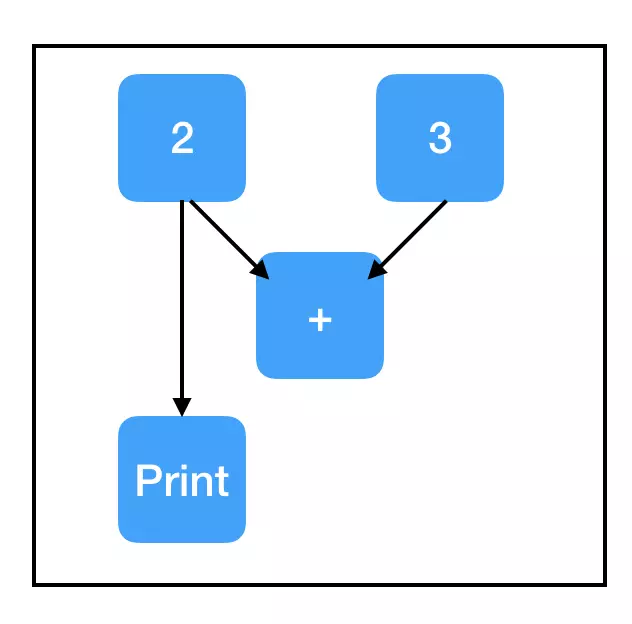

